In [2]:
# 영화 리뷰 데이터 텍스트 분류
# 주요 개념
# 워드 임베딩, 원핫인코딩, 패딩??

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

2.3.0


In [3]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# keras의 dataset은 train_data & labels / test_data & labels로 구성된 것으로 보임
# imdb의 num_words는 최빈 상위 몇번째까지 단어를 선택할지 의미함
# 너무 드물게 등장하는 단어를 모두 포함시켜 학습하면 오히려 정확도가 떨어질 수 있음

17465344/17464789 [==============================] - 0s 0us/step


In [4]:
print("train_data & labels : {}, {}\ntest_data & labels : {}, {}\n".format(len(train_data), len(train_labels), len(test_data), len(test_labels)))

train_data & labels : 25000, 25000
test_data & labels : 25000, 25000



In [5]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
word_index = imdb.get_word_index()

word_index = {k:(v+3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2 # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict((value, key) for key, value in word_index.items())

def decode_reviews(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 0s 0us/step


In [7]:
decode_reviews(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [11]:
"""
preprocessing = 전처리 모듈
image, sequence, text의 submodule이 존재

sequence는 3개의 함수를 갖음
make_sampling_table: rank-based 확률 샘플링 어휘 테이블을 만들어냄
pad_sequences: 서로 다른 길이의 sequence를 padding을 사용해 길이를 일치시켜줌
skipgrams: skipgram word pairs를 만듦

pad_sequences (
padding = 'pre' or 'post' >> pre는 패딩을 앞에, post는 패딩을 뒤에 채워넣는 것
value = 패딩으로 무엇을 삽입할지
maxlen = 시퀀스의 최대 길이
)
"""

train_data = keras.preprocessing.sequence.pad_sequences(
    train_data,
    value = word_index["<PAD>"],
    padding = 'post',
    maxlen = 256
)

test_data = keras.preprocessing.sequence.pad_sequences(
    test_data,
    value = word_index["<PAD>"],
    padding = 'post',
    maxlen = 256
)

In [12]:
print("length of train_data[0]: {}\nlength of test_data[0]: {}\n".format(len(train_data[0]),len(test_data[0])))

length of train_data[0]: 256
length of test_data[0]: 256



In [13]:
# 상위 10000개의 단어를 사용하기로 정했으므로 어휘 사전의 크기를 10000으로 설정
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None, )))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [15]:
x_validation = train_data[:10000]
y_validation = train_labels[:10000]

partial_x_train = train_data[10000:]
partial_y_train = train_labels[10000:]

In [16]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 40,
    batch_size = 512,
    validation_data = (x_validation, y_validation),
    verbose = 1
)

Epoch 1/40
30/30 [==============================] - 1s 22ms/step - loss: 0.6920 - accuracy: 0.5725 - val_loss: 0.6899 - val_accuracy: 0.7135
Epoch 2/40
30/30 [==============================] - 1s 17ms/step - loss: 0.6860 - accuracy: 0.7149 - val_loss: 0.6811 - val_accuracy: 0.7079
Epoch 3/40
30/30 [==============================] - 1s 17ms/step - loss: 0.6715 - accuracy: 0.7193 - val_loss: 0.6626 - val_accuracy: 0.7633
Epoch 4/40
30/30 [==============================] - 1s 17ms/step - loss: 0.6454 - accuracy: 0.7706 - val_loss: 0.6329 - val_accuracy: 0.7757
Epoch 5/40
30/30 [==============================] - 1s 18ms/step - loss: 0.6076 - accuracy: 0.7971 - val_loss: 0.5933 - val_accuracy: 0.7817
Epoch 6/40
30/30 [==============================] - 1s 17ms/step - loss: 0.5606 - accuracy: 0.8185 - val_loss: 0.5482 - val_accuracy: 0.8094
Epoch 7/40
30/30 [==============================] - 1s 17ms/step - loss: 0.5097 - accuracy: 0.8379 - val_loss: 0.5026 - val_accuracy: 0.8228
Epoch 8/40
30

In [17]:
results = model.evaluate(
    test_data,
    test_labels,
    verbose = 2
)

print(results)

782/782 - 1s - loss: 0.3394 - accuracy: 0.8691
[0.33939847350120544, 0.8690800070762634]


In [18]:
history_dict = history.history
for k, v in history_dict.items():
  print("key: {} / value: {}\n".format(k, v))

key: loss / value: [0.6919535398483276, 0.6860461235046387, 0.6715043783187866, 0.6453847289085388, 0.6075642108917236, 0.5605577230453491, 0.5097432136535645, 0.46074795722961426, 0.4168115556240082, 0.379676878452301, 0.34823620319366455, 0.32309314608573914, 0.30053427815437317, 0.2817533314228058, 0.26569798588752747, 0.25098973512649536, 0.23760560154914856, 0.22532783448696136, 0.21442176401615143, 0.20434223115444183, 0.1948959082365036, 0.18612778186798096, 0.17801162600517273, 0.17007580399513245, 0.16309088468551636, 0.15602804720401764, 0.14956992864608765, 0.1435677856206894, 0.1377340853214264, 0.13196291029453278, 0.12683075666427612, 0.12202590703964233, 0.11696357280015945, 0.1124597117304802, 0.10808618366718292, 0.10384324193000793, 0.09962277859449387, 0.09621273726224899, 0.09247579425573349, 0.08880307525396347]

key: accuracy / value: [0.5724666714668274, 0.7148666381835938, 0.7193333506584167, 0.7706000208854675, 0.7970666885375977, 0.8185333609580994, 0.83786666

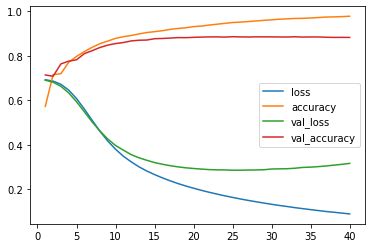

In [21]:
import matplotlib.pyplot as plt

x_lab = range(1,41)

plt.figure()
for k, v in history_dict.items():
  plt.plot(x_lab, v, label=k)
plt.legend()
plt.show()

In [ ]:
"""
과대적합, overfitting이 어디서부터 일어난다고 보는가?

val_loss, val_accuracy를 확인해보면 알 수 있다.

실제 validation 값들을 확인하면 20~25번째 epoch부터 loss가 증가하고 accuracy가 감소한다.

의도적으로 overfitting을 유도한 것이 아니라면, overfitting을 피하고 싶다면

학습을 20~25번째 epoch에서 멈추는 것이 바람직하다.

어떻게 멈추는가? keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')

callbacks = [-]
"""